In [ ]:
import sys
!{sys.executable} -m pip install spacy

In [ ]:
import sys
!{sys.executable} -m pip install newsapi-python

In [ ]:
import sys
!{sys.executable} -m spacy download en_core_web_lg

In [ ]:
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
import sys
!{sys.executable} -m pip install textblob

[nltk_data] Downloading package stopwords to C:\Users\default.DESKTOP-
[nltk_data]     557BIKL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to C:\Users\default.DESKTOP-557B
[nltk_data]     IKL\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\default.DESKTOP-557B
[nltk_data]     IKL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


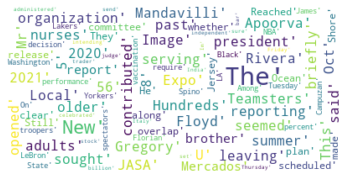

In [34]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient
import pickle
import pandas as pan
import string
import numpy as nump
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as mplot
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='efd923e422d84af7b0c8099ffcfa4111')
temp = newsapi.get_everything(q= 'coronavirus', language='en', from_param='2021-09-28', to='2021-10-21', sort_by='relevancy')

filename = 'articlesCOVID.pckl'
pickle.dump(temp, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
model = pickle.load(open(filename, 'rb'))

filepath = r'C:\Users\default.DESKTOP-557BIKL\Desktop\articlesCOVID.pckl'
pickle.dump(model, open(filepath, 'wb'))

data_frame = pan.DataFrame(temp['articles'])

tokenizer = RegexpTokenizer(r'\w+')

def get_keywords_eng(token):
    result = []
    punctuation = string.punctuation
    stop_words = stopwords.words("english")
    
    for i in token:
        if (i in stop_words):
            continue
        else:
            result.append(i)
            
    return result

results = []
for content in data_frame.content.values:
    content = tokenizer.tokenize(content)
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
data_frame['keywords'] = results

text = str(results)
wordcloud = WordCloud(max_font_size = 30, max_words = 150, background_color="white").generate(text)
mplot.figure()
mplot.imshow(wordcloud, interpolation="bilinear")
mplot.axis("off")
mplot.show()